### Diffusion Equation (1D) with Dirichlet Boundary Condition

$$
  \frac{du}{dt} = D \frac{d^2u}{dx^2}   x\in(0,L), t\in(0,T]
$$

Example

Initial concentration:
$$
u(x,0) = \frac{1}{\sigma \sqrt{2 \pi}} \exp(- \frac{(x-x_{mean})^2}{\sigma ^2})
$$

Dirichlet Bondary Condition:
$$
u_e(0,t) = 0.5
$$




$$
u_e(L,t) = 0.1
$$



In [1]:
import numpy as np
def initial_concent(x, x_mean=0.5, sigma=0.2):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp((x-x_mean)**2/-(sigma**2))

In [2]:
D = 1.0
L = 1
dx = 0.02
x = np.arange(0, L, dx)
Nx = len(x)
dt = 0.5 * dx**2
t = np.arange(0,L , dt)
Nt = len(t)
u0 = initial_concent(x) #x in t_zero

In [3]:
#Courant number
dt/dx**2

0.5

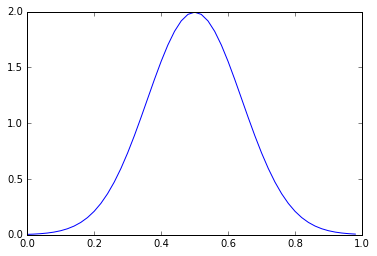

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,u0,'b')

In [5]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

Discretization
$$
\frac{u_i^{n+1} - u_i^n}{\delta t} = D \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\delta x^2} 
$$


$$
u_i^{n+1} = u_i^n  + C  (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
$$

$$
C = D \frac{\delta t}{\delta x^2}
$$

In [6]:
C = D * dt / dx**2

#switch variables before timestepping
u_1= u0.copy()
u = np.zeros_like(u_1)


#the rest time steps
for i in range (1,Nt):
    u[1:-1] = u_1[1:-1] + C * (u_1[2:] -2*u_1[1:-1]+u_1[0:-2])
    #Dirichlet BC
    u[0] = 0.5
    u[-1] = 0.1
    #switch variables
    u_1[:] = u[:]
  

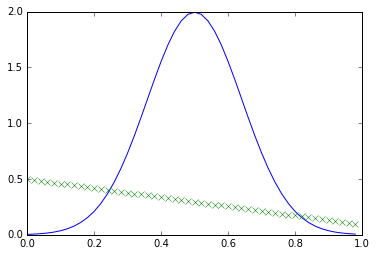

In [7]:
plt.plot(x,u0)
plt.ylim(0,2)
plt.plot(x, u, 'x')

'zoom in' the solution after time len(t)

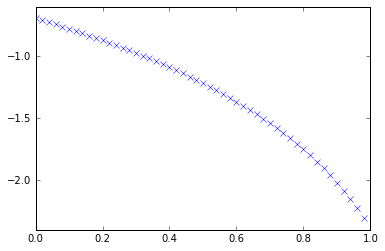

In [8]:

plt.plot(x, np.log(u), 'x')

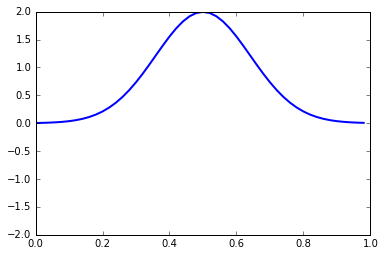

In [9]:
from matplotlib import animation

C = D * dt / dx**2

#plot the first step
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-2,2))
line, = ax.plot(x, u0, lw=2)

#switch variables before timestepping
u_1= u0.copy() 

def do_steps(Nt):
    #the rest time steps
    for i in range (1,Nt):
        u[1:-1] = u_1[1:-1] + C * (u_1[2:] -2*u_1[1:-1]+u_1[0:-2])

        #Dirichlet BC
        u[0] = 0.5
        u[-1] = 0.1
        #switch variables
        u_1[:] = u[:]


    line.set_ydata(u)    # update data in plot
    fig.canvas.draw()# redraw the canvas
    return line,

In [10]:
HTML(animation.FuncAnimation(fig,do_steps, range(100)).to_html5_video())